# Numpy!

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
# since python 3.6, you can add _ as a decorator to make numbers more readable
# list comprehension
# let's create a list of squares length n
n = 10_000 
%timeit nsquared = [x**2 for x in range (n)]

# you can also just do this element wise multiplication with numpy, this is faster
%timeit nsquared = np.arange(n)**2

3.41 ms ± 80.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
11.9 µs ± 67.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Creating arrays

In [99]:
# this is not a list! this is an ndarray
a = np.arange(10) 
print(type(a))

# in a list, we can have different types. so in python we could multply different types
b = [ i*2 for i in [1,2,'da',4,5] ]
print(b)

# to get around this, we use an ndarray as the values must be the same
# we can specify dtype in a ndarray
print(a.dtype)
a = np.arange(10,dtype=float)
print(a.dtype)

# unicode21 is a universal string type that allows all characters from all languages in the world
#np.arange(1,10,2,dtype='<U21')

# this is a useful functiont that allows us to use a : to create an array, which you wouldn't otherwise be allowed to do
c = np.r_[1:10:2]
print(c)
d = np.r_[ 1:10:2,100,200,500 ]
print(d)

# linspace allows you to specify how many numbers you want between two bounds
# this is different to arange, where you say add x to the first bound until you reach the last bound
# linspace gives you floats, so it's useful for using with numbers between 0-1
e = np.linspace(0,100,11)
print(e)

<class 'numpy.ndarray'>
[2, 4, 'dada', 8, 10]
int64
float64
[1 3 5 7 9]
[  1   3   5   7   9 100 200 500]
[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]


In [72]:
n = 10 # number of repititions
a = [1,2]

# repeat elements by a certain number of time
b = np.repeat(a,n)
print(b)

# you can also specify element wise the number of repitions to do
b = np.repeat(a,[n,5])
print(b)

# we can repeat non-element wise also
c = np.resize(a,10)
print(c)

# or by using tile
c = np.tile(a,10)
print(c)

[1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
[1 1 1 1 1 1 1 1 1 1 2 2 2 2 2]
[1 2 1 2 1 2 1 2 1 2]
[1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [87]:
# when calling the random function, anyone who gives the same seed will get the same random numbers
np.random.seed(123)
# this creates an narray of random numbers
np.random.rand(10)
# we can create random numbers around a normal distribution
np.random.normal(10,1,5)
# we can create random intergers between a certain range
np.random.randint(0,5,10)
# we can choose randomly from a list that we supply
np.random.choice(['head','tail'],10)
# we can also specify the probability by which one is chosen over another
np.random.choice(['head','tail'],10,p=[0.8,0.2])
# we can also specify whether or not to put a value back in the pot to be chosen again with 'replace'
np.random.choice([1,2,3,4,5,6,7,8,9,10],10,replace=False)


array([10,  2,  9,  8,  1,  3,  4,  6,  7,  5])

In [111]:
# dimensions
x = np.arange(10)
print(x)
print(len(x))
print(x.shape) # this is not a function, you inherently know the shape of an object, so you just read what you want from it
print(x.ndim)

# we can set the shape of an object, but the new shape has to fit the original object
x.shape = (2,5) # this is the in-place version
print(x)
print(x.ndim)

y = np.arange(10)
y.reshape(2,5) # this is just creating a copy, so you'd have to save it as a variable if you want to replicate it
print(y)

# you can reshape by using -1, and it will calculate the number of rows or columns it needs to shape properly
print(y.reshape(2,-1))
print(y.reshape(-1,2))

[0 1 2 3 4 5 6 7 8 9]
10
(10,)
1
[[0 1 2 3 4]
 [5 6 7 8 9]]
2
[0 1 2 3 4 5 6 7 8 9]
[[0 1 2 3 4]
 [5 6 7 8 9]]
[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]


In [149]:
np.random.seed(123)
a = np.round(np.random.rand(3,2),2)
print(a)

# now let's add column of 1s
rows = x.shape[0]
ones = np.ones(rows+1)
b = np.column_stack((a,ones))
print(b)

# now let's add a column of 2s in the middle
twos = ones+1
c = np.insert(b,1,values=2,axis=1)
print(c)

# in fact, insert can be used in all cases
# insert args are the tensor, the index, the values, the axis
b = np.insert(a,2,ones,axis=1)
print(b)
c = np.insert(b,1,twos,axis=1)
print(c)

[[0.7  0.29]
 [0.23 0.55]
 [0.72 0.42]]
[[0.7  0.29 1.  ]
 [0.23 0.55 1.  ]
 [0.72 0.42 1.  ]]
[[0.7  2.   0.29 1.  ]
 [0.23 2.   0.55 1.  ]
 [0.72 2.   0.42 1.  ]]
[[0.7  0.29 1.  ]
 [0.23 0.55 1.  ]
 [0.72 0.42 1.  ]]
[[0.7  2.   0.29 1.  ]
 [0.23 2.   0.55 1.  ]
 [0.72 2.   0.42 1.  ]]


### Arithmetic operators


In [162]:
# the seven base operators in python have been vectorized in numpy so they work element wise
# element-wise multiplication

print(np.r_[1,2,3] * np.r_[1,10,100])

# this means you can't do a matrix multiplication just using *
a = np.array([[1,10,100,1000],
              [1,10,100,1000]])
print(a)

b = np.array([1,2,3,4])
print(b)
print(a*b)

# to do a matrix multiplication, we use @
# to do this, we need to make sure that row length of matrix 1 is same as column length of matrix 2
c = a@b
print(c)

[  1  20 300]
[[   1   10  100 1000]
 [   1   10  100 1000]]
[1 2 3 4]
[[   1   20  300 4000]
 [   1   20  300 4000]]
[4321 4321]


In [171]:
# Aggregation functions, they create a summary in one value
# functions: np.sum(a), prod, mean, var, std, amax, amin, all, any, median
# methods: a.sum(), prod, mean, var, std, amax, amin, all, any, median

a = np.arange(12)
a.shape = (3,4)
print(a)

# so we can sum along both axes of a matrix
print(a.sum(axis=0))
print(a.sum(axis=1))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[12 15 18 21]
[ 6 22 38]
[12 15 18 21]


In [189]:
# let's import the first 10 rows of the iris dataset

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
iris = np.array(sns.load_dataset("iris").iloc[:10, 0:4])

# standardize the values of the dataset, so that units don't matter. we zero mean and find standard dev to do this
# subtract the means, and divide by std
means = iris.mean(axis=0)
std = iris.std(axis=0)
zero_mean = iris-means
standardized = zero_mean/std
print(means)
print(std)
print(zero_mean)
print(standardized)

# this can all be done in one line of code as well!
standardized = (iris-iris.mean(axis=0))/iris.std(axis=0)
print(standardized)

# the standardised matrix is a matrix of z-scores

# a way to check you have the standardized matrix. each column mean is 0. each column standard dev is 1
print(standardized.mean(axis=0))
print(standardized.std(axis=0))

[4.86 3.31 1.45 0.22]
[0.2764055  0.29137605 0.10246951 0.07483315]
[[ 0.24  0.19 -0.05 -0.02]
 [ 0.04 -0.31 -0.05 -0.02]
 [-0.16 -0.11 -0.15 -0.02]
 [-0.26 -0.21  0.05 -0.02]
 [ 0.14  0.29 -0.05 -0.02]
 [ 0.54  0.59  0.25  0.18]
 [-0.26  0.09 -0.05  0.08]
 [ 0.14  0.09  0.05 -0.02]
 [-0.46 -0.41 -0.05 -0.02]
 [ 0.04 -0.21  0.05 -0.12]]
[[ 0.86828953  0.65207831 -0.48795004 -0.26726124]
 [ 0.14471492 -1.06391725 -0.48795004 -0.26726124]
 [-0.57885968 -0.37751902 -1.46385011 -0.26726124]
 [-0.94064699 -0.72071813  0.48795004 -0.26726124]
 [ 0.50650222  0.99527742 -0.48795004 -0.26726124]
 [ 1.95365143  2.02487476  2.43975018  2.40535118]
 [-0.94064699  0.3088792  -0.48795004  1.06904497]
 [ 0.50650222  0.3088792   0.48795004 -0.26726124]
 [-1.66422159 -1.40711636 -0.48795004 -0.26726124]
 [ 0.14471492 -0.72071813  0.48795004 -1.60356745]]
[[ 0.86828953  0.65207831 -0.48795004 -0.26726124]
 [ 0.14471492 -1.06391725 -0.48795004 -0.26726124]
 [-0.57885968 -0.37751902 -1.46385011 -0.2672612

### COMPARISON AND RELATIONAL OPERATORS

In [203]:
a = np.arange(12)
a.shape = (3,4)
print(a)

b = a > 6 # creates a boolean matrix, looking at each element to find the condition
print(b)

# we can also check along a row of a matrix, but we must supply the same numbr of conditions
# this is done element wise
c = a > np.r_[1,2,3,4]
print(c)

# which elements in a are between 4 and 8?
# we use & to do a vectorised "AND" in python
d = (4 <= a) & (a <= 8)
print(d)

# verify if all of the values in similar matrices are the same
print(np.all(a == a))
# or do this for any element
b = [1,2,3,4]
print(np.any(a == b))

# we can find the number of elements that are greater than a number
# remember that the function inside the brackets here first calculates the boolean matrix, and then np.sum sums it
print(np.sum(a>7))

# this gives the proportion of the elements that meet a requirement
print(np.mean(a>7))

# we can turn a boolean matrix into 1 and 0s
print((a>7).astype(np.int_))  # the _ here denotes that it should be the default integer type

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[False False False False]
 [False False False  True]
 [ True  True  True  True]]
[[False False False False]
 [ True  True  True  True]
 [ True  True  True  True]]
[[False False False False]
 [ True  True  True  True]
 [ True False False False]]
True
False
4
0.3333333333333333
[[0 0 0 0]
 [0 0 0 0]
 [1 1 1 1]]


### VECTORIZED MATHS

[ 0.00000000e+00  2.53654584e-01  4.90717552e-01  6.95682551e-01
  8.55142763e-01  9.58667853e-01  9.99486216e-01  9.74927912e-01
  8.86599306e-01  7.40277997e-01  5.45534901e-01  3.15108218e-01
  6.40702200e-02 -1.91158629e-01 -4.33883739e-01 -6.48228395e-01
 -8.20172255e-01 -9.38468422e-01 -9.95379113e-01 -9.87181783e-01
 -9.14412623e-01 -7.81831482e-01 -5.98110530e-01 -3.75267005e-01
 -1.27877162e-01  1.27877162e-01  3.75267005e-01  5.98110530e-01
  7.81831482e-01  9.14412623e-01  9.87181783e-01  9.95379113e-01
  9.38468422e-01  8.20172255e-01  6.48228395e-01  4.33883739e-01
  1.91158629e-01 -6.40702200e-02 -3.15108218e-01 -5.45534901e-01
 -7.40277997e-01 -8.86599306e-01 -9.74927912e-01 -9.99486216e-01
 -9.58667853e-01 -8.55142763e-01 -6.95682551e-01 -4.90717552e-01
 -2.53654584e-01 -4.89858720e-16]


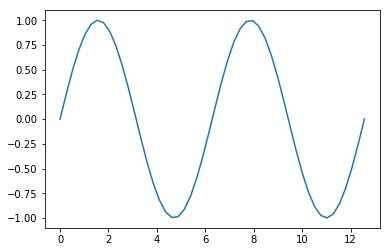

In [213]:
# we can call vectorized functions that will act on all elements of a vector, such as sin, cosine, sqrt, log, round etc...
x = np.linspace(0,4*np.pi,50)
y = np.sin(x)
print(y)
plt.plot(x,y)

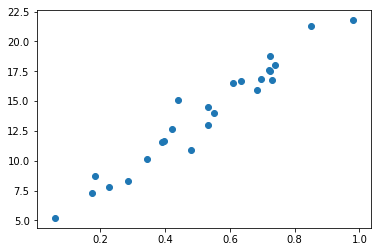

In [216]:
# let's plot some random data with some added noise
np.random.seed(123)
x = np.random.rand(25)
y = np.random.randn(25)+20*x+4 # 20x + 4 is our noise here
plt.scatter(x,y)

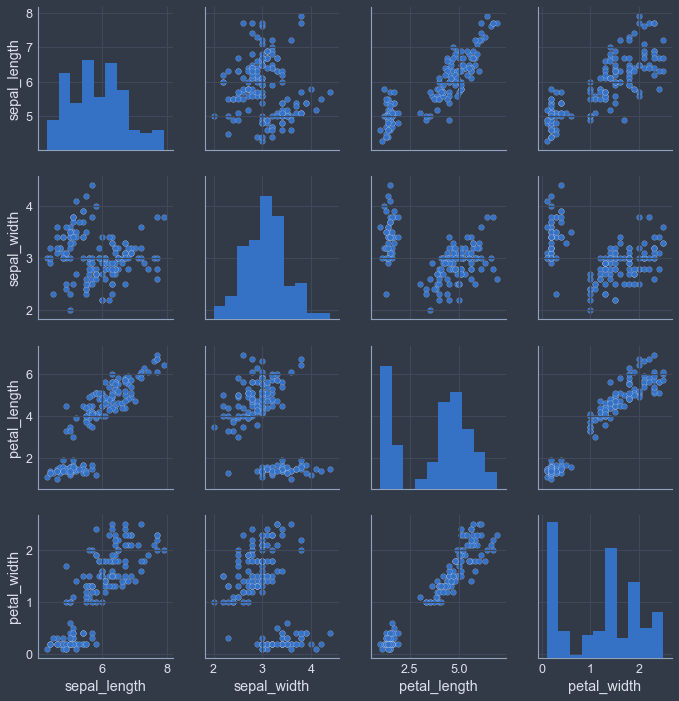

In [218]:
from jupyterthemes import jtplot
jtplot.style('chesterish')
sns.pairplot(sns.load_dataset("iris"))

In [424]:
# let's define a function that calculates a pearson coefficient. it's a measure of linear correlation between two variables
# it has a value between -1 and 1. 1 is total linear correlation, and 0 is no linear correlation
# pearson does a good job at linearly correlated variables
# for non-linearly correlated variables, we'd used the spearman coefficient

np.random.seed(123)
x = np.random.rand(25)
y = np.random.randn(25)+20*x+4 # 20x + 4 is our noise here

def pearson(x,y):
    numerator = np.sum( (x - x.mean()) * (y-y.mean()) )
    denominator = np.sqrt(np.sum((x - x.mean())**2)) * np.sqrt(np.sum((y - y.mean())**2))
    pearson_coef = numerator / denominator
    pearson_coef = np.round(pearson_coef,3)
    return pearson_coef

print(pearson(x,y))

# you can do this all in a nice scipy function!
# the two numbers that come out are the pearson coefficient, and the p-value
# p-values are only used in small sample datasets, we won't use this in big data with companies
import scipy
print(scipy.stats.pearsonr(x,y))
iris = np.array(sns.load_dataset("iris").iloc[:, 0:4])


# let's get the pearson coeffs for iris variables against eachother
pearson_iris = [pearson(iris[:,i],iris[:,j]) for i in range(4) for j in range(4)]
pearson_iris = np.asarray(pearson_iris)
pearson_iris.shape = (4,4)
print(pearson_iris)

# we can do this without forloops
iris_std = (iris - np.mean(iris,axis=0)) / np.std(iris,axis=0,ddof=0)
iris_std.T @ iris_std/iris.shape[0]

0.973
(0.9730180056190826, 3.7898578167586404e-16)
[[ 1.    -0.118  0.872  0.818]
 [-0.118  1.    -0.428 -0.366]
 [ 0.872 -0.428  1.     0.963]
 [ 0.818 -0.366  0.963  1.   ]]


array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

### Vector and matrix indexing

In [298]:
x = [1,2,3,4,5]
print(x[0])
print(x[-2]) # this indexes backwards
print(x[0:2]) # remember that the output of this is another list

x = np.r_[1,2,3,4,5] # create a ndarray
print(x[0])
print(x[:-1]) # take up until the last element

# you can do something called masking which is cool!
print( x[ np.r_[True,False,True,False,True] ] )

# filtering - the x>3 creates a boolean vector!
print(x[x>3])

# another example of masking with a conditional filter
names = np.array(['Phil','James','Dan','Jon'])
years = np.array([2018,2018,2019,2022])
print(names[years>2018])

1
4
[1, 2]
1
[1 2 3 4]
[1 3 5]
[4 5]
['Dan' 'Jon']


### Exercise

In [394]:
np.random.seed(6)
x = np.round(np.random.normal(size=20),2)
print(x)

[-0.31  0.73  0.22 -0.9  -2.49  0.91  1.13 -1.51  1.64 -0.43  2.63  0.6
 -0.34  1.24  0.11  0.13  0.08 -0.16  0.63  0.81]


In [414]:
# print number of non-negative values
print(np.sum(x>=0))
# print proportion of non-negative values
print(np.mean(x>=0))
# print mean of abs values
print(np.abs(x).mean())
# print elements which are most distant from 0
print(np.abs(x).argmax())
# print elements that are closest to 0
print(np.abs(x).argmin())
# determine 3 elements that are the most distant from the mean of x
print(np.abs(x - np.mean(x)).argsort()[-3:])
# remove outliers from x, based on quartiles
q1 = np.percentile(x,25)
q3 = np.percentile(x,75)
iqr = q3-q1
lower_outlier = q1 - 1.5*iqr
upper_outlier = q3 + 1.5*iqr
# | does OR
print(x[np.invert((x<lower_outlier) | (x>upper_outlier))])
# print new array based on conditional. this is a great line of code that does an if else statement for us
print(np.where(x>=0,"non-negative","negative"))
print(np.where(x<-1,"small",np.where(x>1,"large","medium")))

13
0.65
0.85
10
16
[ 7 10  4]
[-0.31  0.73  0.22 -0.9   0.91  1.13 -1.51  1.64 -0.43  0.6  -0.34  1.24
  0.11  0.13  0.08 -0.16  0.63  0.81]
['negative' 'non-negative' 'non-negative' 'negative' 'negative'
 'non-negative' 'non-negative' 'negative' 'non-negative' 'negative'
 'non-negative' 'non-negative' 'negative' 'non-negative' 'non-negative'
 'non-negative' 'non-negative' 'negative' 'non-negative' 'non-negative']
['medium' 'medium' 'medium' 'medium' 'small' 'medium' 'large' 'small'
 'large' 'medium' 'large' 'medium' 'medium' 'large' 'medium' 'medium'
 'medium' 'medium' 'medium' 'medium']


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf



/Users/garethjones/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

# Matrix Indexing

In [3]:
A = np.r_[1:13].reshape(3, 4)
A

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [4]:
print(A[0,1]) # this provides a specific index in a matrix, a scalar
print(A[2,::2]) # this selects the third row, and then all column values up to (not including) index 2, a vector
print(A[2:,-1]) # this skips first two rows, takes the remaining and then selects the last column, a vector
print(A[2:,A.mean(axis=0)>5]) # first calcs the mean of each column, creates a boolean matrix, selects only those true in the third column, a vector
print(A[[1,0,-1,0],1]) # selects the second column, from that column, chooses indexes given by [1,0,-1,0]
print(A[::-1,2:]) # selecting with 2 slices will create a matrix. Select all rows until the last one, select third col onwards

# We can do element wise selections
print(np.r_[0,1,2,3].reshape(-1,1)) # this reshape says put everything in one column, and take as many rows as you need
print(np.r_[0,1,2,3].reshape(1,-1)) # this reshape says put everything in one row, and take as many columns as you need

# this is element wise row and column selections!
# to do this, the vectors needs to be of the same size, if not there'll be an error
print(A[ [0,-1,0] , [0,1,2] ]) 

# this will select a chunk of the matrix, but we need to make the vectors vertical and horizontal to do that
# we're saying select the first and last row, and all the columns, because we're making them into row and column arrays
print(A[ np.r_[0,-1].reshape(-1,1), np.r_[0,1,2].reshape(1,-1) ])

# this method .ix_ does the reshaping above for us! so we can select the rows and columns we want from a matrix easily
print(np.ix_([0,-1], [0,1,2]))
print( A[ np.ix_([0,-1], [0,1,2]) ]) 

2
[ 9 11]
[12]
[[10 11 12]]
[ 6  2 10  2]
[[11 12]
 [ 7  8]
 [ 3  4]]
[[0]
 [1]
 [2]
 [3]]
[[0 1 2 3]]
[ 1 10  3]
[[ 1  2  3]
 [ 9 10 11]]
(array([[ 0],
       [-1]]), array([[0, 1, 2]]))
[[ 1  2  3]
 [ 9 10 11]]


In [5]:
# something to be clear on!
# slicing convention is "from", "to", "by"

# I don't understand why these wo are different?
print(A[:-1,:]) # this says: go from all, until all but one
print(A[:-1:])

# this says select all rows and columns, but move backwards through them
print(A[::-1])

[[1 2 3 4]
 [5 6 7 8]]
[[1 2 3 4]
 [5 6 7 8]]
[[ 9 10 11 12]
 [ 5  6  7  8]
 [ 1  2  3  4]]
